# Problem Statement

This project focuses in investigating the probability of predicting the type of breast cancer (malignant or benign) from the given characteristics of breast mass computed from digitized images. This project will examine the data available and attempt to predict the possibility that a breast cancer diagnosis is malignant or benign based on the attributes collected from the breast mass. To achieve this goal, the following steps are identified: •	Download the breast cancer images data from UCI repository •	Familiarize with the data by looking at its shape, the relations between variables, their possible correlations, and other attributes of the dataset

In [1]:
#Import all the libraries 

import numpy as np 
import pandas as pd 
import csv 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm 
from sklearn.neighbors import NearestNeighbors 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB  
from scipy import stats 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.grid_search import GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics  
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#load data
data = pd.read_csv("data.csv")

In [3]:
#check out the first two rows to make sure it loaded correctly
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])
print (malignant)

212


In [5]:
#Number of benign cases
benign = len(data[data['diagnosis']=='B'])
print (benign)

357


In [6]:
#how many cases are included in the dataset
length = len(data)
print (length)

569


In [7]:
#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100
print (rate)

37.258347978910365


In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
#make diagnosis column numerical
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [10]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [11]:
#radius mean is the mean of distances from center to points on the perimeter of breast mass
#so let's look at maximum, minimum, average, and standard deviation of radius mean
min_radius = min(data['radius_mean'])
max_radius = max(data['radius_mean'])
average_radius = np.mean(data['radius_mean'])
sd_radius = np.std(data['radius_mean'])

print (min_radius)
print (max_radius)
print (average_radius)
print (sd_radius)

6.981
28.11
14.127291739894563
3.5209507607110626


In [12]:
#texture mean is the standard deviation of gray scale value
#so let's look at maximum, minimum, average, and standard deviation of texture mean
min_texture = min(data['texture_mean'])
max_texture = max(data['texture_mean'])
average_texture = np.mean(data['texture_mean'])
sd_texture = np.std(data['texture_mean'])

print (min_texture)
print (max_texture)
print (average_texture)
print (sd_texture)

9.71
39.28
19.28964850615117
4.297254637090421


In [13]:
def histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(" Distribution "+ var_name)

    plt.rcParams.update({'font.size': 6, 'font.weight':'bold'})
    plt.show()

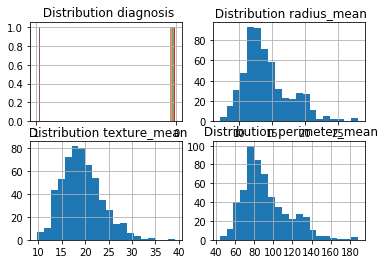

In [14]:
features=list(data.columns[1:5])
histograms(data,features,2,2)

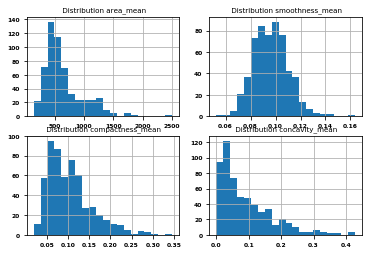

In [15]:
features1=list(data.columns[5:9])
histograms(data,features1,2,2)

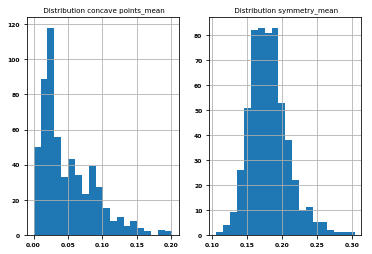

In [16]:
features2=list(data.columns[9:11])
histograms(data,features2,1,2)

I'm going to use various classifiers (K-neighbors, Decision trees, SVC, QDA, AdaBoost, Naïve Bayes, Random Forest, and MLP classifier) to predict the data with different sets of training samples. Once the best predicting model is identified, will reduce the training set in size to see what is the limit for this classifier to best predict these data. 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [18]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [19]:
X.shape

(569, 31)

In [20]:
Y.shape

(569,)

In [21]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, make_scorer

models = []
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
models.append(( 'ADA' , AdaBoostClassifier()))

num_folds = 10
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    model.fit(X_train,Y_train)
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.749227 (0.035641) (run time: 0.027676)
CART: 0.914348 (0.036193) (run time: 0.074659)
RF: 0.945024 (0.049729) (run time: 0.203070)
NB: 0.619565 (0.076432) (run time: 0.018230)
SVM: 0.619614 (0.082882) (run time: 0.108184)
ADA: 0.953961 (0.040001) (run time: 2.272133)


As we can see the resualt, GaussianNB model is the fastest and Random Forest is the more time consuming model. AdaBoostClassifier gave us the best resualt so far. By using the pipeline, i'm trying to improve my models. 

## precision/recall scores:

I used Accuracy to select the best model.
I'm using precision and recall to get the best out of my models and fully evaluate the effectiveness of a model. Here again, we see that AdaBoostClassifier gives us the best score.

In [23]:
from sklearn.metrics import precision_recall_fscore_support

#for test dataset
for name, model in models:
    res = model.predict(X_test)
    precision,recall,fbeta,_ = precision_recall_fscore_support(y_true = Y_test,y_pred=res,average="weighted")
    print(precision)
    print(recall)
    print(fbeta)
    print()
    

0.7195236114000415
0.7280701754385965
0.7040190542125413

0.9409983291562238
0.9385964912280702
0.9391070268263251

0.9651216493321757
0.9649122807017544
0.9646814404432132

0.4308337214718212
0.6491228070175439
0.5179171332586786

0.43282548476454297
0.6578947368421053
0.5221386800334169

0.9746963562753036
0.9736842105263158
0.9734158926728587



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# for train dataset
for name, model in models:
    res = model.predict(X_train)
    precision,recall,fbeta,_ = precision_recall_fscore_support(y_true = Y_train,y_pred=res,average="weighted")
    print(precision)
    print(recall)
    print(fbeta)
    print()

0.8620373749083711
0.8505494505494505
0.8440120580185727

1.0
1.0
1.0

0.995635350564928
0.9956043956043956
0.9955993837701457

0.5759056673663416
0.6197802197802198
0.4930717300979101

1.0
1.0
1.0

1.0
1.0
1.0



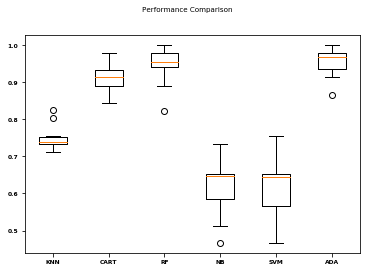

In [25]:
import matplotlib.pyplot as plt 
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

As we can see, Ada boost and Random Forest are more time consuming compare to others, but they gave us a better resualt so far. I'm going to create a pipeline to modify the models and reevaluate the resualt. 

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

pipelines = []

pipelines.append(( 'ScaledRF' , Pipeline([( 'Scaler' , StandardScaler()),( 'RF' ,
    RandomForestClassifier())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
pipelines.append(( 'ScaledADA' , Pipeline([( 'Scaler' , StandardScaler()),( 'ADA' , AdaBoostClassifier())])))
num_folds = 10
results = []
names = []

scoring = []
for name, model in models:
    res = model.predict(X_test)
    recall = recall_score(y_true = Y_test,y_pred=res,average="weighted")

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall_weighted')
    model.fit(X_train,Y_train)
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.749227 (0.035641) (run time: 0.031472)
CART: 0.929807 (0.028828) (run time: 0.089598)
RF: 0.934251 (0.059713) (run time: 0.216319)
NB: 0.619565 (0.076432) (run time: 0.021860)
SVM: 0.619614 (0.082882) (run time: 0.113245)
ADA: 0.947391 (0.039604) (run time: 2.387183)


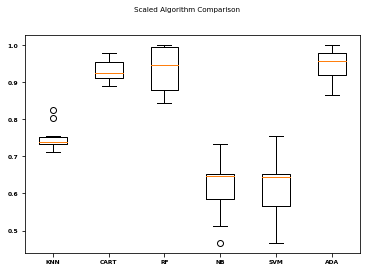

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Conclusion

Fisrt, I identified this problem as classification. After comparing diffrenet modeles, the resulat are showing AdaBoost and Random forest are generating the more accurate resualts compare to others. Adaptive Boosting focuses on classification problems and aims to convert a set of weak classifiers into a strong one. 